In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

/home/asphyxia/anaconda3/envs/tensorflow/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [58]:
new_df = pd.read_csv('RAMON_DATASET.csv')
new_df.min_channel_allowed.unique()
#find the first occurence of min_channel_allowed = 2
new_df[new_df.min_channel_allowed == 2].index[0]

97

In [59]:



def rotate(l, n):
    return l[-n::] + l[:-n]

airtime = []
for idx,val in new_df.iterrows():
    airtime.append(new_df.at[idx,"airtime_0"])
    airtime.append(new_df.at[idx,"airtime_1"])
    airtime.append(new_df.at[idx,"airtime_2"])
    airtime.append(new_df.at[idx,"airtime_3"])
    airtime.append(new_df.at[idx,"airtime_4"])
    airtime.append(new_df.at[idx,"airtime_5"])
    airtime.append(new_df.at[idx,"airtime_6"])
    airtime.append(new_df.at[idx,"airtime_7"])
    airtime=rotate(airtime,new_df.at[idx,"min_channel_allowed"])
    new_df.at[idx,"airtime_0"] = airtime[0]
    new_df.at[idx,"airtime_1"] = airtime[1]
    new_df.at[idx,"airtime_2"] = airtime[2]
    new_df.at[idx,"airtime_3"] = airtime[3]
    new_df.at[idx,"airtime_4"] = airtime[4]
    new_df.at[idx,"airtime_5"] = airtime[5]
    new_df.at[idx,"airtime_6"] = airtime[6]
    new_df.at[idx,"airtime_7"] = airtime[7]
    airtime.clear()



#rotate the list based on the value of min_channel_allowed
# for idx,val in new_df.iterrows():






In [55]:
new_df["min_channel_allowed"][97]

2

In [60]:
print(new_df["airtime_0"][97])
print(new_df["airtime_1"][97])
print(new_df["airtime_2"][97])
print(new_df["airtime_3"][97])
print(new_df["airtime_4"][97])
print(new_df["airtime_5"][97])
print(new_df["airtime_6"][97])
print(new_df["airtime_7"][97])

0.0
0.0
39.52
25.67
0.0
0.0
0.0
0.0


In [61]:
new_df.to_csv("RAMON_DATASET.csv")

In [2]:
df =pd.read_csv("RAMON_DATASET.csv")

df.head()

,Unnamed: 0.1,Unnamed: 0,node_code,node_type,wlan_code,x(m),y(m),z(m),central_freq(GHz),channel_bonding_model,...,rssi_std,num_stations,airtime_0,airtime_1,airtime_2,airtime_3,airtime_4,airtime_5,airtime_6,airtime_7
0,0,0,AP_A,0,A,7.5000,8.3333,8.3417,5.0,4,...,64.328276,10.0,50.3,50.3,50.3,50.3,0.0,0.0,0.0,0.0
1,1,1,STA_A1,1,A,12.0627,4.6918,5.0670,5.0,4,...,NaN,NaN,50.3,50.3,50.3,50.3,0.0,0.0,0.0,0.0
2,2,2,STA_A2,1,A,8.2712,4.8383,9.9676,5.0,4,...,NaN,NaN,50.3,50.3,50.3,50.3,0.0,0.0,0.0,0.0
3,3,3,STA_A3,1,A,8.4824,3.5287,8.9153,5.0,4,...,NaN,NaN,50.3,50.3,50.3,50.3,0.0,0.0,0.0,0.0
4,4,4,STA_A4,1,A,1.3639,1.8250,8.3635,5.0,4,...,NaN,NaN,50.3,50.3,50.3,50.3,0.0,0.0,0.0,0.0


In [3]:
print(df["min_channel_allowed"][95:105])
df[95:105]

95     0
96     0
97     2
98     2
99     2
100    2
101    2
102    2
103    2
104    2
Name: min_channel_allowed, dtype: int64


,Unnamed: 0.1,Unnamed: 0,node_code,node_type,wlan_code,x(m),y(m),z(m),central_freq(GHz),channel_bonding_model,...,rssi_std,num_stations,airtime_0,airtime_1,airtime_2,airtime_3,airtime_4,airtime_5,airtime_6,airtime_7
95,95,95,STA_G13,1,G,38.6458,21.9819,3.2445,5.0,4,...,NaN,NaN,31.44,20.48,20.48,20.48,16.57,16.57,16.57,16.57
96,96,96,STA_G14,1,G,38.7488,31.1876,4.0894,5.0,4,...,NaN,NaN,31.44,20.48,20.48,20.48,16.57,16.57,16.57,16.57
97,97,97,AP_H,0,H,52.5000,25.0000,5.9277,5.0,4,...,61.273618,15.0,0.00,0.00,39.52,25.67,0.00,0.00,0.00,0.00
98,98,98,STA_H1,1,H,50.4763,15.9889,5.6975,5.0,4,...,NaN,NaN,0.00,0.00,39.52,25.67,0.00,0.00,0.00,0.00
99,99,99,STA_H2,1,H,48.1628,18.5680,3.2172,5.0,4,...,NaN,NaN,0.00,0.00,39.52,25.67,0.00,0.00,0.00,0.00
100,100,100,STA_H3,1,H,57.0279,33.1312,8.5287,5.0,4,...,NaN,NaN,0.00,0.00,39.52,25.67,0.00,0.00,0.00,0.00
101,101,101,STA_H4,1,H,43.7223,28.7453,6.4483,5.0,4,...,NaN,NaN,0.00,0.00,39.52,25.67,0.00,0.00,0.00,0.00
102,102,102,STA_H5,1,H,42.6343,24.7465,3.2268,5.0,4,...,NaN,NaN,0.00,0.00,39.52,25.67,0.00,0.00,0.00,0.00
103,103,103,STA_H6,1,H,55.7207,19.3820,9.9467,5.0,4,...,NaN,NaN,0.00,0.00,39.52,25.67,0.00,0.00,0.00,0.00
104,104,104,STA_H7,1,H,56.5512,17.6954,8.1559,5.0,4,...,NaN,NaN,0.00,0.00,39.52,25.67,0.00,0.00,0.00,0.00


In [4]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'node_code', 'node_type', 'wlan_code',
       'x(m)', 'y(m)', 'z(m)', 'central_freq(GHz)', 'channel_bonding_model',
       'primary_channel', 'min_channel_allowed', 'max_channel_allowed',
       'tpc_default(dBm)', 'cca_default(dBm)', 'traffic_model',
       'traffic_load[pkt/s]', 'packet_length', 'num_packets_aggregated',
       'capture_effect_model', 'capture_effect_thr', 'constant_per',
       'pifs_activated', 'cw_adaptation', 'cont_wind', 'cont_wind_stage',
       'throughput', 'sinr', 'rssi', 'airtime', 'int_map', 'distance',
       'distance_mean', 'distance_std', 'sinr_mean', 'sinr_std', 'rssi_mean',
       'rssi_std', 'num_stations', 'airtime_0', 'airtime_1', 'airtime_2',
       'airtime_3', 'airtime_4', 'airtime_5', 'airtime_6', 'airtime_7'],
      dtype='object')

In [5]:
df.drop(['Unnamed: 0','node_code','wlan_code', 'x(m)', 'y(m)','z(m)', 'central_freq(GHz)','primary_channel',
       'min_channel_allowed', 'max_channel_allowed', 'tpc_default(dBm)',
       'cca_default(dBm)', 'traffic_model', 'traffic_load[pkt/s]',
       'packet_length', 'num_packets_aggregated', 'capture_effect_model',
       'capture_effect_thr', 'constant_per', 'pifs_activated', 'cw_adaptation',
       'cont_wind', 'cont_wind_stage','sinr', 'rssi', 'airtime',
       'int_map', 'distance'],axis=1,inplace=True)

In [6]:
df.columns

Index(['Unnamed: 0.1', 'node_type', 'channel_bonding_model', 'throughput',
       'distance_mean', 'distance_std', 'sinr_mean', 'sinr_std', 'rssi_mean',
       'rssi_std', 'num_stations', 'airtime_0', 'airtime_1', 'airtime_2',
       'airtime_3', 'airtime_4', 'airtime_5', 'airtime_6', 'airtime_7'],
      dtype='object')

In [7]:
# drop all rows with node_type 1
df = df[df.node_type != 1]
df.shape[0]

19200

In [8]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [9]:
a = [1.0,2.0]
a = np.array(a)
a = torch.from_numpy(a)
type(a)

torch.Tensor

In [44]:
mean_tpt = np.mean(df["throughput"])
max_tpt = np.max(df["throughput"])
min_tpt = np.min(df["throughput"])
print(mean_tpt,max_tpt,min_tpt)

20.58574427083333 256.85 0.0


In [10]:
import torch

In [11]:
#make a dataloader
from sklearn.preprocessing import OneHotEncoder

class Data(torch.utils.data.Dataset):
    def __init__(self,df):
        row_val = []
        self.df = df
        throughputs = []
        a_list = []
        b_list = []
        j = 0
        k=12

        for i,val in self.df.iterrows():
            # print(i)
            if i==7680:
                k=10
                print("hi")
            if i==14080:
                k=8
                print("hi again")
           
            distance_mean = self.df.at[i,"distance_mean"]
            distance_std = self.df.at[i,"distance_std"]
            sinr_mean = self.df.at[i,"sinr_mean"]
            sinr_std = self.df.at[i,"sinr_std"]
            rssi_mean = self.df.at[i,"rssi_mean"]
            rssi_std = self.df.at[i,"rssi_std"]
            num_stations = self.df.at[i,"num_stations"]
            airtime_0 = self.df.at[i,"airtime_0"]
            airtime_1 = self.df.at[i,"airtime_1"]
            airtime_2 = self.df.at[i,"airtime_2"]
            airtime_3 = self.df.at[i,"airtime_3"]
            airtime_4 = self.df.at[i,"airtime_4"]
            airtime_5 = self.df.at[i,"airtime_5"]
            airtime_6 = self.df.at[i,"airtime_6"]
            airtime_7 = self.df.at[i,"airtime_7"]
            throughput = self.df.at[i,"throughput"]
            a = np.array([distance_mean,distance_std,sinr_mean,sinr_std,rssi_mean,rssi_std,num_stations,airtime_0,airtime_1,airtime_2,airtime_3,airtime_4,airtime_5,airtime_6,airtime_7])
            b = np.array([throughput])
            a_list.append(a)
            b_list.append(b)
            j+=1
            if j==k:
                throughputs.append(b_list)
                row_val.append(a_list)
                j=0
                a_list = []
                b_list = []
            
        self.ap_data = row_val
        self.targets = throughputs

    def __getitem__(self,index):
        ap_data = self.ap_data[index]
        target = self.targets[index]
        
        info = torch.tensor(np.array(ap_data, dtype=np.float32))
        targets = torch.tensor(np.array(target, dtype=np.float32))
        
        # return the features and the target as a tuple
        return (info, targets)

    def __len__(self):
        return len(self.targets)
    


In [12]:
0.2*19200

3840.0

In [13]:
df.reset_index(inplace=True)

In [26]:
# data = Data(df)
data1 = Data(df[0:7680])
data2 = Data(df[7680:14080])
data3 = Data(df[14080:19200])

hi
hi again


In [27]:
train1, validation1 = torch.utils.data.random_split(data1, [512,128])
train2, validation2 = torch.utils.data.random_split(data2, [512,128])
train3, validation3 = torch.utils.data.random_split(data3, [512,128])

train_loader = torch.utils.data.DataLoader(dataset= torch.utils.data.ConcatDataset((train1,train2,train3)), batch_size=64)
validation_loader = torch.utils.data.DataLoader(dataset= torch.utils.data.ConcatDataset((validation1,validation2,validation3)), batch_size=64)


In [28]:
len(data1+data2+data3)

1920

In [29]:
len(train_loader)

24

In [30]:
for batch in train_loader:
    print(batch[0][0].shape)

torch.Size([12, 15])
torch.Size([12, 15])
torch.Size([12, 15])
torch.Size([12, 15])
torch.Size([12, 15])
torch.Size([12, 15])
torch.Size([12, 15])
torch.Size([12, 15])
torch.Size([10, 15])
torch.Size([10, 15])
torch.Size([10, 15])
torch.Size([10, 15])
torch.Size([10, 15])
torch.Size([10, 15])
torch.Size([10, 15])
torch.Size([10, 15])
torch.Size([8, 15])
torch.Size([8, 15])
torch.Size([8, 15])
torch.Size([8, 15])
torch.Size([8, 15])
torch.Size([8, 15])
torch.Size([8, 15])
torch.Size([8, 15])


# MLP

In [31]:
#print the tensor shapes
1600*12

19200

In [ ]:
# class MLP_PyTorch(nn.Module):
#     def __init__(self):   
#         super(MLP_PyTorch, self).__init__()     
        
#         self.Linear_sinr = nn.Linear(2, 1)  
#         self.Linear_rssi = nn.Linear(2, 1)
#         self.Linear_dist = nn.Linear(2, 1)
#         self.Linear_signal = nn.Sequential(
#             nn.Linear(4, 5),
#             nn.PReLU(),
#         )
#         self.Linear_airtime = nn.Sequential(
#             nn.Linear(8, 5),
#             nn.PReLU(),
#         )
#         self.Linear_throughput = nn.Sequential(
#             nn.Linear(10,7),
#             nn.PReLU(),
#             nn.Linear(7,1),
#             nn.PReLU(),
#         )
#         self.norm3 = nn.BatchNorm1d(4)
#         self.prelu = nn.ReLU()
        

#     # Define the forward pass of the module using the sub-modules declared in the initializer
#     def forward(self, X):
#         batch_size = X.size(0)
#         N_APs = X.size(1)
#         n = X[:,:,6,np.newaxis]

#         sinr = self.Linear_sinr(X[:,:,:2])
#         rssi = self.Linear_rssi(X[:,:,2:4])
#         dist = self.Linear_dist(X[:,:,4:6])

#         signal = torch.cat((rssi, dist, sinr, n), axis=2)
#         signal = self.norm3(torch.flatten(signal,end_dim=1)).reshape(batch_size,N_APs,4)
#         signal = self.prelu(signal)
#         signal = self.Linear_signal(signal)        

#         airtime = self.Linear_airtime(X[:,:,7:])

#         throughput = self.Linear_throughput(torch.cat((signal,airtime),axis=2))
#         # print(throughput.shape)

#         return throughput


In [87]:
class MLP_PyTorch(nn.Module):
    def __init__(self):   
        super(MLP_PyTorch, self).__init__()     
        
        self.Linear_sinr = nn.Linear(2, 1)  
        self.Linear_rssi = nn.Linear(2, 1)
        self.Linear_dist = nn.Linear(2, 1)
        self.Linear_signal = nn.Sequential(
            nn.Linear(4, 5),
            nn.PReLU(),
        )
        self.Linear_airtime = nn.Sequential(
            nn.Linear(8, 5),
            nn.PReLU(),
        )
        self.Linear_throughput = nn.Sequential(
            nn.Linear(10,8),
            nn.PReLU(),
            nn.Linear(8,1),
            nn.PReLU(),
        )
        self.norm3 = nn.BatchNorm1d(4)
        self.prelu = nn.ReLU()
        

    # Define the forward pass of the module using the sub-modules declared in the initializer
    def forward(self, X):
        batch_size = X.size(0)
        N_APs = X.size(1)
        n = X[:,:,6,np.newaxis]

        sinr = self.Linear_sinr(X[:,:,:2])
        rssi = self.Linear_rssi(X[:,:,2:4])
        dist = self.Linear_dist(X[:,:,4:6])

        signal = torch.cat((rssi, dist, sinr, n), axis=2)
        signal = self.norm3(torch.flatten(signal,end_dim=1)).reshape(batch_size,N_APs,4)
        signal = self.prelu(signal)
        signal = self.Linear_signal(signal)        

        airtime = self.Linear_airtime(X[:,:,7:])

        throughput = self.Linear_throughput(torch.cat((signal,airtime),axis=2))
        # print(throughput.shape)

        return throughput


In [88]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# device = "cpu"

In [89]:
# Function to train our MLP with PyTorch
def train_PyTorch(NN, train_loader, validation_loader, criterion,  optimizer = None, num_epochs = 3000, model_name='MLP_3k_2.0.ckpt', device=device):
    train_list_loss = []
    validation_list_loss = [] 
    for epoch in range(num_epochs):        
        loss_avg = 0
        nBatches = 0        
        validation_loss_avg = 0
        validation_nBatches = 0
        
        NN.train()
        for i, (data, targets) in enumerate(train_loader):
            X = data.to(device)
            y = targets.to(device)
            
            # reset optimizer at each epoch
            optimizer.zero_grad()
           
            # make prediction
            yHat = NN.forward(X)

            # compute the loss function
            loss = criterion(yHat,y)
        
            # Backward and optimize
            loss.backward()
            optimizer.step()

            loss_avg += loss.cpu().item()
            nBatches+=1

        NN.eval()
        for i, (data, targets) in enumerate(validation_loader):
            X = data.to(device)
            y = targets.to(device)
            
            # make prediction
            yHat = NN.forward(X)

            # compute the loss function
            loss = criterion(yHat,y)

            validation_loss_avg += loss.cpu().item()
            validation_nBatches+=1


        # Print loss and save the value at each iteration
        if epoch%100 == 0 : 
            print('Loss {} = {} , {}'.format(epoch,loss_avg / nBatches, validation_loss_avg / validation_nBatches))
        train_list_loss.append(loss_avg / nBatches)
        validation_list_loss.append(validation_loss_avg / validation_nBatches)



    print('Loss {} = {} , {}'.format(epoch,loss_avg / nBatches, validation_loss_avg / validation_nBatches))
    torch.save(NN.state_dict(), model_name)
    return train_list_loss, validation_list_loss

In [90]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [91]:
device

device(type='cuda')

Loss 0 = 403.00751813252765 , 195.1831487019857
Loss 100 = 22.943014939626057 , 45.62170124053955
Loss 200 = 20.893503109614056 , 50.63892809549967
Loss 300 = 20.317391872406006 , 28.843649864196777
Loss 400 = 20.036632180213928 , 30.921769460042317
Loss 500 = 19.781888167063396 , 24.44678783416748
Loss 600 = 19.4853302637736 , 23.14904562632243
Loss 700 = 19.867165605227154 , 26.128805955251057
Loss 800 = 19.417421301205952 , 23.7121844291687
Loss 900 = 19.238895734151203 , 22.93459145228068
Loss 1000 = 19.14715365568797 , 20.85088586807251
Loss 1100 = 20.23788793881734 , 29.66122341156006
Loss 1200 = 20.866191347440083 , 24.306328773498535
Loss 1300 = 20.101499557495117 , 24.605292479197185
Loss 1400 = 19.563877165317535 , 24.71010748545329
Loss 1500 = 20.56840439637502 , 22.22520097096761
Loss 1600 = 20.239897151788075 , 22.07961416244507
Loss 1700 = 20.63958712418874 , 23.71029758453369
Loss 1800 = 19.83840771516164 , 24.85382016499837
Loss 1900 = 20.946345806121826 , 23.4068756103

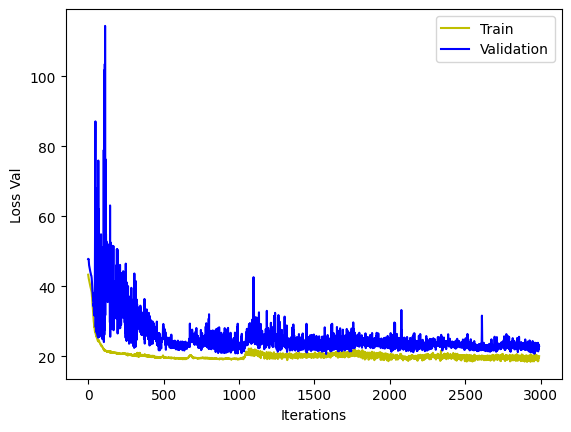

In [92]:
# Initialize a Pytorch MLP
NN = MLP_PyTorch().to(device)

optimizer = torch.optim.Adam(NN.parameters(), lr= 2E-2) 
criterion = nn.MSELoss()

#Train MLP using Pytorch:
train_list_loss, validation_list_loss = train_PyTorch(NN, train_loader, validation_loader, criterion, num_epochs = 3000, optimizer = optimizer, device=device)

# Plot the evolution of the loss function during training
plt.plot(train_list_loss[10:],c='y', label="Train")
plt.plot(validation_list_loss[10:],c='b', label="Validation")
plt.xlabel('Iterations')
plt.ylabel('Loss Val')
plt.legend(loc="upper right")
plt.show()


torch.Size([15360]) torch.Size([15360])


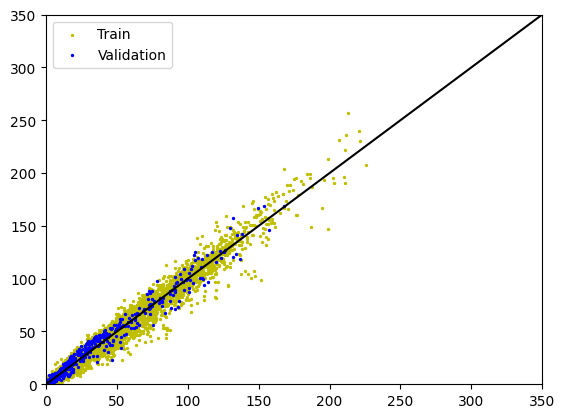

In [95]:
NN = MLP_PyTorch()
NN.eval()
NN.load_state_dict(torch.load( 'MLP_3k_2.0.ckpt'))

y_train = torch.empty(0)
y_hat_train = torch.empty(0)
for x, y in train_loader:
  y_hat_train = torch.cat((y_hat_train,torch.flatten(NN(x))))
  y_train = torch.cat((y_train,torch.flatten(y)))
print(y_hat_train.shape, y_train.shape)
plt.scatter(y_hat_train.detach(), y_train, s=2,c='y', label= "Train")

x_test, y_test = next(iter(validation_loader))
y_test = torch.flatten(y_test)
y_hat_test = torch.flatten(NN(x_test))
plt.scatter(y_hat_test.cpu().detach(), y_test, s=2,c='b', label="Validation")

plt.plot(np.arange(350),c='black')
plt.ylim(0, 350)
plt.xlim(0, 350)
plt.legend(loc="upper left")
plt.show()


In [96]:
## Load, compute predictions.

NN = MLP_PyTorch()
NN.eval()
NN.load_state_dict(torch.load('MLP_3k_2.0.ckpt'))
data_4, target_4 = next(iter(validation_loader))


APs_4_predicted_throughput = NN.forward(data_4)


def print_plot_scenario(predictions, targets, num_of_scen, N_APs):
    results = np.zeros((num_of_scen))
    for i in range(num_of_scen):
        results[i] = criterion(predictions[i], targets[i]).item()
    # print('\n %d APs :\n'%(N_APs), np.sort(results))

    y_test = torch.flatten(targets)
    y_hat_test = torch.flatten(predictions).detach().numpy()
    print('$'*10)
    for i in range(len(y_hat_test)):
        print(y_hat_test[i],y_test[i])
        print("######################################")
    # print(y_test.shape)
    plt.scatter(y_hat_test, y_test, s=2)
    plt.ylabel('Real Throughput')
    plt.xlabel('Predicted Throughput')
    plt.plot(np.arange(350),c='black')
    plt.ylim(0, 350)
    plt.xlim(0, 350)
    plt.show()


4 TOTAL ROOT Mean squared error: 5.07
4 TOTAL Mean squared error: 25.67
$$$$$$$$$$
0.024885828 tensor(0.)
######################################
0.03863313 tensor(0.)
######################################
0.033789337 tensor(0.)
######################################
12.786483 tensor(13.5300)
######################################
0.043509174 tensor(0.)
######################################
0.030819718 tensor(0.)
######################################
4.1563454 tensor(2.1300)
######################################
5.9335213 tensor(7.3300)
######################################
8.048355 tensor(7.0400)
######################################
6.550233 tensor(10.2900)
######################################
12.964015 tensor(16.7600)
######################################
36.98464 tensor(41.9500)
######################################
99.36315 tensor(99.8400)
######################################
47.426643 tensor(41.8100)
######################################
65.33848 tensor(72.5300)
#####

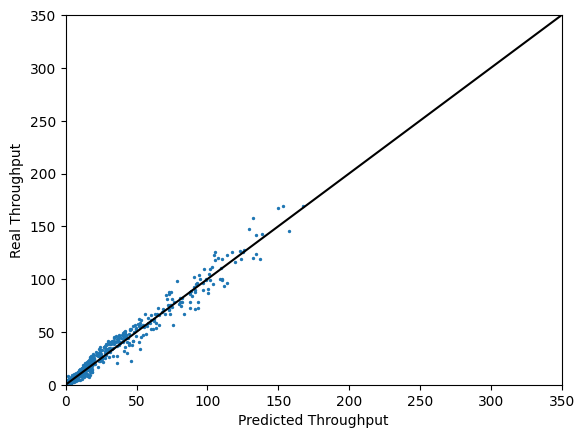

In [97]:
## Compute the MSE of each scenario and plot the predictions.
import math
criterion = nn.MSELoss() 

print("4 TOTAL ROOT Mean squared error: %.2f" % math.sqrt(criterion(APs_4_predicted_throughput,target_4).item()))
print("4 TOTAL Mean squared error: %.2f" % (criterion(APs_4_predicted_throughput,target_4).item()))
print_plot_scenario(APs_4_predicted_throughput, target_4, 40, 4)


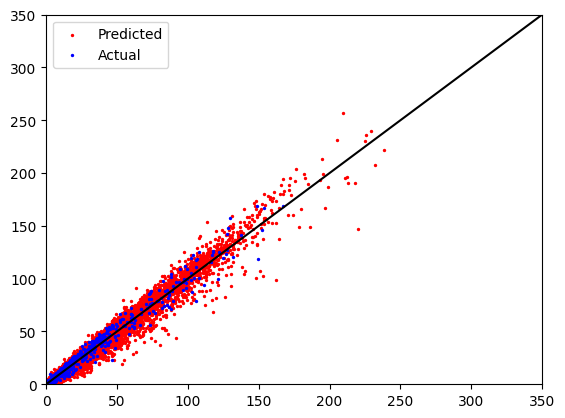

In [80]:
# import matplotlib.pyplot as plt
# import numpy as np

NN = MLP_PyTorch()
NN.eval()
NN.load_state_dict(torch.load('MLP_5k.ckpt'))

y_train = torch.empty(0)
y_hat_train = torch.empty(0)
for x, y in train_loader:
    y_hat_train = torch.cat((y_hat_train, torch.flatten(NN(x))))
    y_train = torch.cat((y_train, torch.flatten(y)))

plt.scatter(y_hat_train.detach(), y_train, s=2, c='r', label="Predicted")  # Changed color to red

x_test, y_test = next(iter(validation_loader))
y_test = torch.flatten(y_test)
y_hat_test = torch.flatten(NN(x_test))
plt.scatter(y_hat_test.cpu().detach(), y_test, s=2, c='b', label="Actual")  # Changed color to blue

plt.plot(np.arange(350), c='black')
plt.ylim(0, 350)
plt.xlim(0, 350)
plt.legend(loc="upper left")
plt.show()
